In [121]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [14]:
df = pd.read_csv("final-result-1.csv")
df.head()

,Rank,University Name,Domain,MX,SPF,DKIM,DMARC
0,1,Tsinghua University,tsinghua.edu.cn,[<DNS IN MX rdata: 10 mta0.tsinghua.edu.cn.>],True,True,True
1,2,Peking University,pku.edu.cn,[<DNS IN MX rdata: 0 mx1.pku.edu.cn.>],True,True,True
2,3,Zhejiang University,zju.edu.cn,[<DNS IN MX rdata: 10 mail.zju.edu.cn.>],True,False,False
3,4,Shanghai Jiao Tong University,sjtu.edu.cn,[<DNS IN MX rdata: 20 mx03.sjtu.edu.cn.>],True,False,False
4,5,Fudan University,fudan.edu.cn,[<DNS IN MX rdata: 1 mx-fudan-edu-cn.icoremail...,True,True,True


In [15]:
len(df)

847

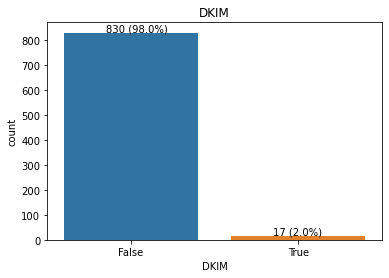

In [74]:
ax = sns.countplot(x="DKIM", data=df)
# add the counts and percentages to the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:d} ({:.1f}%)'.format(height, height/len(df)*100), (p.get_x()+0.25, height+3))
plt.title("DKIM")
df.value_counts("DKIM")
plt.savefig('DKIM.jpg')

In [19]:
def check_auth(row):
  if row["SPF"] and row["DMARC"]:
    return "both"
  elif row["SPF"]:
    return "SPF"
  elif row["DMARC"]:
    return "DMARC"
  else:
    return "Neither"
  
df["auth"] = df.apply(lambda x: check_auth(x), axis=1)

In [20]:
df

,Rank,University Name,Domain,MX,SPF,DKIM,DMARC,auth
0,1,Tsinghua University,tsinghua.edu.cn,[<DNS IN MX rdata: 10 mta0.tsinghua.edu.cn.>],True,True,True,both
1,2,Peking University,pku.edu.cn,[<DNS IN MX rdata: 0 mx1.pku.edu.cn.>],True,True,True,both
2,3,Zhejiang University,zju.edu.cn,[<DNS IN MX rdata: 10 mail.zju.edu.cn.>],True,False,False,SPF
3,4,Shanghai Jiao Tong University,sjtu.edu.cn,[<DNS IN MX rdata: 20 mx03.sjtu.edu.cn.>],True,False,False,SPF
4,5,Fudan University,fudan.edu.cn,[<DNS IN MX rdata: 1 mx-fudan-edu-cn.icoremail...,True,True,True,both
...,...,...,...,...,...,...,...,...
842,927,Harbin Huade University,hhdu.edu.cn,[<DNS IN MX rdata: 10 mail.hhdu.edu.cn.>],False,False,False,Neither
843,929,Heilongjiang College of Business and Technology,hibu.edu.cn,[<DNS IN MX rdata: 0 hibu-edu-cn.mail.protecti...,True,False,False,SPF
844,930,Dalian University of Science and Technology,dlust.edu.cn,[<DNS IN MX rdata: 10 hzmx02.mxmail.netease.co...,True,False,True,both
845,934,West Yunnan University of Applied Sciences,wyuas.edu.cn,[<DNS IN MX rdata: 10 mail.wyuas.edu.cn.>],True,False,False,SPF


auth
DMARC       16
Neither    174
SPF        408
both       249
Name: University Name, dtype: int64


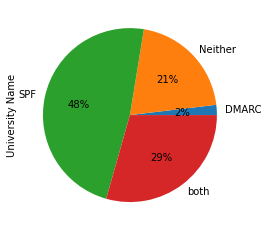

In [176]:
df_auth = df.groupby(['auth']).count()['University Name']
print(df_auth)
df_auth.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%')
plt.savefig("general_auth.pdf")

In [29]:
def mx(row):
    if "qq" in row["MX"]:
        return "qq"
    elif "netease" in row["MX"]:
        return "netease"
    elif "icoremail" in row["MX"]:
        return "coremail"
    elif "163" in row["MX"]:
        return "netease"
    elif "outlook" in row["MX"]:
        return "outlook"
    elif "eyou" in row["MX"]:
        return "eyou"
    elif "aliyun" in row["MX"]:
        return "aliyun"
    elif "edu.cn" in row["MX"]:
        return "own server"
    else:
        return "other"

df["Server"] = df.apply(lambda x: mx(x), axis=1)

In [30]:
df

,Rank,University Name,Domain,MX,SPF,DKIM,DMARC,auth,Server
0,1,Tsinghua University,tsinghua.edu.cn,[<DNS IN MX rdata: 10 mta0.tsinghua.edu.cn.>],True,True,True,both,own server
1,2,Peking University,pku.edu.cn,[<DNS IN MX rdata: 0 mx1.pku.edu.cn.>],True,True,True,both,own server
2,3,Zhejiang University,zju.edu.cn,[<DNS IN MX rdata: 10 mail.zju.edu.cn.>],True,False,False,SPF,own server
3,4,Shanghai Jiao Tong University,sjtu.edu.cn,[<DNS IN MX rdata: 20 mx03.sjtu.edu.cn.>],True,False,False,SPF,own server
4,5,Fudan University,fudan.edu.cn,[<DNS IN MX rdata: 1 mx-fudan-edu-cn.icoremail...,True,True,True,both,coremail
...,...,...,...,...,...,...,...,...,...
842,927,Harbin Huade University,hhdu.edu.cn,[<DNS IN MX rdata: 10 mail.hhdu.edu.cn.>],False,False,False,Neither,own server
843,929,Heilongjiang College of Business and Technology,hibu.edu.cn,[<DNS IN MX rdata: 0 hibu-edu-cn.mail.protecti...,True,False,False,SPF,outlook
844,930,Dalian University of Science and Technology,dlust.edu.cn,[<DNS IN MX rdata: 10 hzmx02.mxmail.netease.co...,True,False,True,both,netease
845,934,West Yunnan University of Applied Sciences,wyuas.edu.cn,[<DNS IN MX rdata: 10 mail.wyuas.edu.cn.>],True,False,False,SPF,own server


Server
aliyun          4
coremail       52
eyou            8
netease       208
other          28
outlook         9
own server    183
qq            355
Name: University Name, dtype: int64


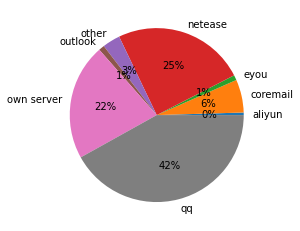

In [75]:
df_sev = df.groupby(['Server']).count()['University Name']
print(df_sev)
ax = df_sev.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%')
ax.set_ylabel("")
plt.savefig("general_mx.pdf")

In [32]:
df.to_csv('analysis-result.csv')

In [152]:
df_sev1 = dict(df[0:10].groupby(['Server']).count()['University Name'])
df_sev2 = dict(df[0:30].groupby(['Server']).count()['University Name'])
df_sev3 = dict(df[0:50].groupby(['Server']).count()['University Name'])
df_sev4 = dict(df[0:100].groupby(['Server']).count()['University Name'])
df_sev5 = dict(df[0:300].groupby(['Server']).count()['University Name'])
df_sev6 = dict(df[301:len(df)].groupby(['Server']).count()['University Name'])

labels = ["qq", "netease", "coremail", "outlook", "eyou", "aliyun", "own server", "other"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],
                                          [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[df_sev1.get("qq"), df_sev1.get("netease"), 
                                            df_sev1.get("coremail"), df_sev1.get("outlook")
                                           , df_sev1.get("eyou"), df_sev1.get("aliyun")
                                           , df_sev1.get("own server"), df_sev1.get("other")], name="top10"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[df_sev2.get("qq"), df_sev2.get("netease"), 
                                            df_sev2.get("coremail"), df_sev2.get("outlook")
                                           , df_sev2.get("eyou"), df_sev2.get("aliyun")
                                           , df_sev2.get("own server"), df_sev2.get("other")], name="top30"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=[df_sev3.get("qq"), df_sev3.get("netease"), 
                                            df_sev3.get("coremail"), df_sev3.get("outlook")
                                           , df_sev3.get("eyou"), df_sev3.get("aliyun")
                                           , df_sev3.get("own server"), df_sev3.get("other")], name="top50"), 1, 3)
fig.add_trace(go.Pie(labels=labels, values=[df_sev4.get("qq"), df_sev4.get("netease"), 
                                            df_sev4.get("coremail"), df_sev4.get("outlook")
                                           , df_sev4.get("eyou"), df_sev4.get("aliyun")
                                           , df_sev4.get("own server"), df_sev4.get("other")], name="top100"), 2, 1)
fig.add_trace(go.Pie(labels=labels, values=[df_sev5.get("qq"), df_sev5.get("netease"), 
                                            df_sev5.get("coremail"), df_sev5.get("outlook")
                                           , df_sev5.get("eyou"), df_sev5.get("aliyun")
                                           , df_sev5.get("own server"), df_sev5.get("other")], name="top300"), 2, 2)
fig.add_trace(go.Pie(labels=labels, values=[df_sev6.get("qq"), df_sev6.get("netease"), 
                                            df_sev6.get("coremail"), df_sev6.get("outlook")
                                           , df_sev6.get("eyou"), df_sev6.get("aliyun")
                                           , df_sev6.get("own server"), df_sev6.get("other")], name="300+"), 2, 3)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="MX record",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='top10', x=0.115, y=0.825, font_size=15, showarrow=False),
                 dict(text='top30', x=0.5, y=0.825, font_size=15, showarrow=False),
                 dict(text='top50', x=0.89, y=0.825, font_size=15, showarrow=False),
                 dict(text='top100', x=0.11, y=0.185, font_size=15, showarrow=False),
                 dict(text='top300', x=0.5, y=0.185, font_size=15, showarrow=False),
                 dict(text='300+', x=0.885, y=0.185, font_size=15, showarrow=False),])
fig.show()

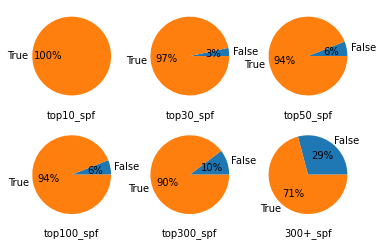

In [172]:
df_sev1 = df[0:10].groupby(['SPF']).count()['University Name']
df_sev2 = df[0:30].groupby(['SPF']).count()['University Name']
df_sev3 = df[0:50].groupby(['SPF']).count()['University Name']
df_sev4 = df[0:100].groupby(['SPF']).count()['University Name']
df_sev5 = df[0:300].groupby(['SPF']).count()['University Name']
df_sev6 = df[301:len(df)].groupby(['SPF']).count()['University Name']


fig1 = plt.figure()
ax1 = fig1.add_subplot(231)
ax2 = fig1.add_subplot(232)
ax3 = fig1.add_subplot(233)
ax4 = fig1.add_subplot(234)
ax5 = fig1.add_subplot(235)
ax6 = fig1.add_subplot(236)


plot1 = df_sev1.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%', ax=ax1, colors=['#ff7f0e'])
plot1.set_ylabel("")
plot1.set_xlabel("top10_spf")

plot2 = df_sev2.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%', ax=ax2)
plot2.set_ylabel("")
plot2.set_xlabel("top30_spf")

plot3 = df_sev3.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%', ax=ax3)
plot3.set_ylabel("")
plot3.set_xlabel("top50_spf")

plot4 = df_sev4.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%', ax=ax4)
plot4.set_ylabel("")
plot4.set_xlabel("top100_spf")

plot5 = df_sev5.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%', ax=ax5)
plot5.set_ylabel("")
plot5.set_xlabel("top300_spf")

plot6 = df_sev6.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%', ax=ax6)
plot6.set_ylabel("")
plot6.set_xlabel("300+_spf")

plt.savefig("spf.pdf")

SPF
False    190
True     657
Name: University Name, dtype: int64


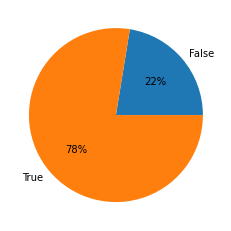

In [88]:
df_spf = df.groupby(['SPF']).count()['University Name']
print(df_spf)
ax = df_spf.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%')
ax.set_ylabel("")
plt.savefig("general_spf.pdf")

DMARC
False    582
True     265
Name: University Name, dtype: int64


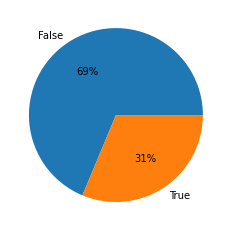

In [173]:
df_dmarc = df.groupby(['DMARC']).count()['University Name']
print(df_dmarc)
ax = df_dmarc.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%')
ax.set_ylabel("")
plt.savefig("general_dmarc.pdf")

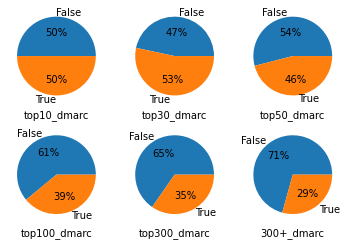

In [175]:
df_sev1 = df[0:10].groupby(['DMARC']).count()['University Name']
df_sev2 = df[0:30].groupby(['DMARC']).count()['University Name']
df_sev3 = df[0:50].groupby(['DMARC']).count()['University Name']
df_sev4 = df[0:100].groupby(['DMARC']).count()['University Name']
df_sev5 = df[0:300].groupby(['DMARC']).count()['University Name']
df_sev6 = df[301:len(df)].groupby(['DMARC']).count()['University Name']


fig1 = plt.figure()
ax1 = fig1.add_subplot(231)
ax2 = fig1.add_subplot(232)
ax3 = fig1.add_subplot(233)
ax4 = fig1.add_subplot(234)
ax5 = fig1.add_subplot(235)
ax6 = fig1.add_subplot(236)


plot1 = df_sev1.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%', ax=ax1)
plot1.set_ylabel("")
plot1.set_xlabel("top10_dmarc")

plot2 = df_sev2.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%', ax=ax2)
plot2.set_ylabel("")
plot2.set_xlabel("top30_dmarc")

plot3 = df_sev3.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%', ax=ax3)
plot3.set_ylabel("")
plot3.set_xlabel("top50_dmarc")

plot4 = df_sev4.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%', ax=ax4)
plot4.set_ylabel("")
plot4.set_xlabel("top100_dmarc")

plot5 = df_sev5.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%', ax=ax5)
plot5.set_ylabel("")
plot5.set_xlabel("top300_dmarc")

plot6 = df_sev6.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%', ax=ax6)
plot6.set_ylabel("")
plot6.set_xlabel("300+_dmarc")

plt.savefig("dmarc.pdf")

In [182]:
df_sev1 = dict(df[0:10].groupby(['auth']).count()['University Name'])
df_sev2 = dict(df[0:30].groupby(['auth']).count()['University Name'])
df_sev3 = dict(df[0:50].groupby(['auth']).count()['University Name'])
df_sev4 = dict(df[0:100].groupby(['auth']).count()['University Name'])
df_sev5 = dict(df[0:300].groupby(['auth']).count()['University Name'])
df_sev6 = dict(df[301:len(df)].groupby(['auth']).count()['University Name'])

labels = ["SPF", "DMARC", "Both", "Neither"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],
                                          [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[df_sev1.get("SPF"), df_sev1.get("DMARC"), 
                                            df_sev1.get("both"), df_sev1.get("Neither")], name="top10"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[df_sev2.get("SPF"), df_sev2.get("DMARC"), 
                                            df_sev2.get("both"), df_sev2.get("Neither")], name="top30"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=[df_sev3.get("SPF"), df_sev3.get("DMARC"), 
                                            df_sev3.get("both"), df_sev3.get("Neither")], name="top50"), 1, 3)
fig.add_trace(go.Pie(labels=labels, values=[df_sev4.get("SPF"), df_sev4.get("DMARC"), 
                                            df_sev4.get("both"), df_sev4.get("Neither")], name="top100"), 2, 1)
fig.add_trace(go.Pie(labels=labels, values=[df_sev5.get("SPF"), df_sev5.get("DMARC"), 
                                            df_sev5.get("both"), df_sev5.get("Neither")], name="top300"), 2, 2)
fig.add_trace(go.Pie(labels=labels, values=[df_sev6.get("SPF"), df_sev6.get("DMARC"), 
                                            df_sev6.get("both"), df_sev6.get("Neither")], name="300+"), 2, 3)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Auth",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='top10', x=0.115, y=0.825, font_size=15, showarrow=False),
                 dict(text='top30', x=0.5, y=0.825, font_size=15, showarrow=False),
                 dict(text='top50', x=0.89, y=0.825, font_size=15, showarrow=False),
                 dict(text='top100', x=0.11, y=0.185, font_size=15, showarrow=False),
                 dict(text='top300', x=0.5, y=0.185, font_size=15, showarrow=False),
                 dict(text='300+', x=0.885, y=0.185, font_size=15, showarrow=False),])
fig.show()